In [14]:
import os
import math
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data exploration

In [15]:
dt=pd.read_csv("Housing.csv")
dt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
dt.tail(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [17]:
dt.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [25]:
data_description = dt.describe()




### Feature selection 


In [22]:
# Exclude non-numerical columns before computing the correlation matrix
numerical_data = dt.select_dtypes(include=[np.number])

# Computing the correlation matrix for numerical variables only
correlation_matrix = numerical_data.corr()

# Selecting Features Based on Correlation with 'price'
# We select features that have a significant correlation with the target variable 'price'.
selected_features = correlation_matrix['price'].abs().sort_values(ascending=False)[1:]
selected_features = selected_features[selected_features > 0.3].index.tolist()
print(f"Selected Features based on Correlation with 'price': {selected_features}")

Selected Features based on Correlation with 'price': ['area', 'bathrooms', 'stories', 'parking', 'bedrooms']


## Visulization

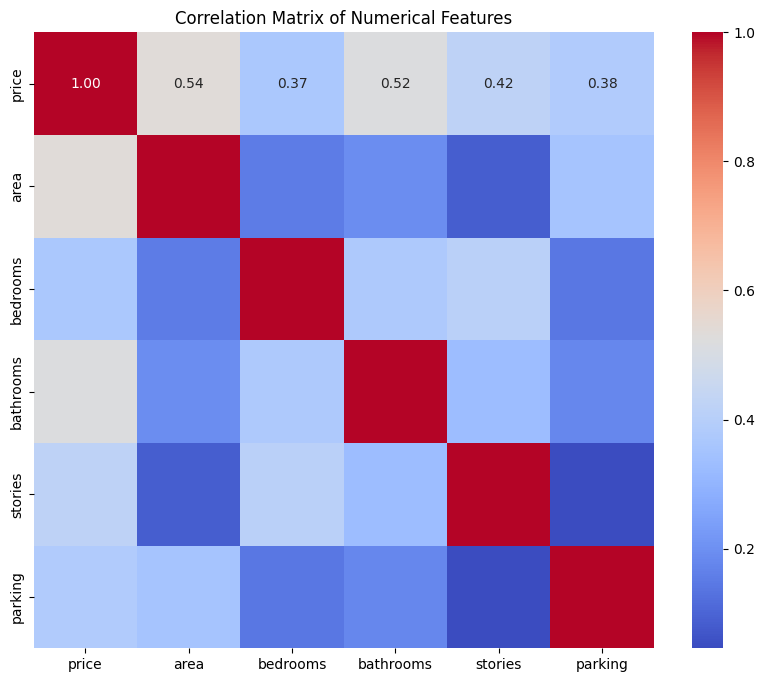

In [24]:

# Compute the correlation matrix for numerical variables
correlation_matrix_numerical = numerical_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
# Preparing the data for modeling with selected features
X = dt[selected_features]
y = dt['price']


In [28]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression 

In [29]:
# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [30]:
# Making predictions
y_pred = model.predict(X_test)


In [31]:
model.score(X_test,y_test)

0.5464062355495873

### Evaluation

In [36]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [33]:
# Display model coefficients and performance metrics
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

# Output results
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print("Model Coefficients:")
print(coefficients)
print(f"Intercept: {intercept}")

RMSE: 1514173.552049223
R-squared: 0.5464062355495873
Model Coefficients:
            Coefficient
area       3.088670e+02
bathrooms  1.185732e+06
stories    4.951008e+05
parking    3.376608e+05
bedrooms   1.512468e+05
Intercept: 51999.676808834076


In [35]:
import statsmodels.api as sm

# Adding a constant to the predictor variables
X_with_constant = sm.add_constant(X_train)

# Fitting the model
model_sm = sm.OLS(y_train, X_with_constant).fit()

# Displaying the summary of the regression model for inference
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     110.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           7.71e-75
Time:                        07:38:56   Log-Likelihood:                -6707.6
No. Observations:                 436   AIC:                         1.343e+04
Df Residuals:                     430   BIC:                         1.345e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         5.2e+04   2.56e+05      0.203      0.8

### Model 2

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [39]:
# Making predictions
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Displaying the performance metrics
print(f"Random Forest Regressor - RMSE: {rmse}")
print(f"Random Forest Regressor - R-squared: {r2}")

Random Forest Regressor - RMSE: 1610526.2716666241
Random Forest Regressor - R-squared: 0.486841661049932
